In [9]:
import os
import pandas as pd

import sys
sys.path.append('../cytof/')
from hyperion_analysis import visualize_normalization, batch_scale_feature

In [10]:
class options:
    def __init__(self):
        self.cohort_file    = "../test_data/test_cohort.csv"
        self.outdir         = "../test_out/cohort/test_cohort_"
        self.normq          = [75, 99]
params = options()

## Visualize feature normalization

In [13]:
# # put to hyperion_analysis.py???
# import matplotlib.pyplot as plt
# import numpy as np
# from classes import load_saved_CytofImage
# def _gather_roi_expressions(df_io, normqs=[75]):
#     """Only cell level sum"""
#     expressions = {}
#     expressions_normed = {}
#     for roi in df_io["ROI"].unique():
#         expressions[roi] = []
#         f_cytof_im = df_io.loc[df_io["ROI"]==roi,"output_file"].values[0]
#         cytof_im   = load_saved_CytofImage(f_cytof_im) 
#         for feature_name in cytof_im.features['cell_sum']:
#             expressions[roi].extend(cytof_im.df_feature[feature_name])
#         expressions_normed[roi] = dict((q, {}) for q in normqs)
#         for q in expressions_normed[roi].keys():
#             expressions_normed[roi][q] = []
#             normed_feat = getattr(cytof_im, "df_feature_{}normed".format(q))
#             for feature_name in cytof_im.features['cell_sum']:
#                 expressions_normed[roi][q].extend(normed_feat[feature_name])
#     return expressions, expressions_normed
        

# def visualize_normalization(df_slide_roi, normqs=[75], level="slide"):
#     expressions_, expressions_normed_ = _gather_roi_expressions(df_slide_roi, normqs=normqs)
#     if level == "slide":
#         prefix = "Slide"
#         expressions, expressions_normed = {}, {}
#         for slide in df_slide_roi["Slide"].unique():
#             f_rois = df_slide_roi.loc[df_slide_roi["Slide"]==slide, "ROI"].values
#             rois   = [x.replace('.txt', '') for x in f_rois]
#             expressions[slide] = []
#             expressions_normed[slide] = dict((q, []) for q in normqs)
#             for roi in rois:
#                 expressions[slide].extend(expressions_[roi])
                
#                 for q in expressions_normed[slide].keys():
#                     expressions_normed[slide][q].extend(expressions_normed_[roi][q])
                
#     else:
#         expressions, expressions_normed = expressions_, expressions_normed_
#         prefix = "ROI"
#     num_q = len(normqs)
#     for key, key_exp in expressions.items():  # create a new plot for each slide (or ROI)
#         print("Showing {} {}".format(prefix, key))
#         fig, ax = plt.subplots(1, num_q+1, figsize=(4*(num_q+1), 4))
#         ax[0].hist((np.log2(np.array(key_exp)+0.0001),), 100, density=True)
#         ax[0].set_title("Before normalization")
#         ax[0].set_xlabel("log2(cellular expression of all markers)")
#         for i,q in enumerate(normqs):
#             ax[i+1].hist((np.array(expressions_normed[key][q])+0.0001,), 100, density=True)
#             ax[i+1].set_title("After {}-th percentile normalization".format(q))
#             ax[i+1].set_xlabel("log2(cellular expression of all markers)")
#         plt.show()
#     return expressions, expressions_normed

Showing Slide NP39264_B3


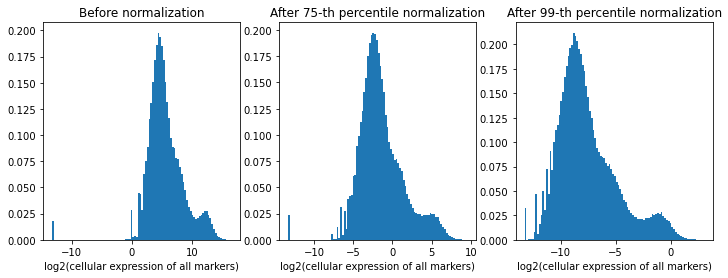

Showing Slide NP37646_B5


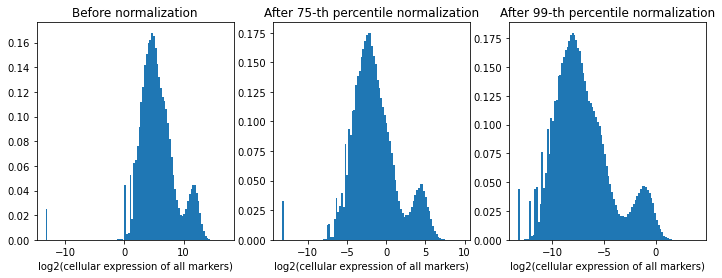

In [17]:
df_io = pd.read_csv(os.path.join(params.outdir, "input_output.csv"))

expressions, expressions_normed = visualize_normalization(df_io, normqs=[75, 99], level="slide")

## Feature Scaling

In [50]:
# import pickle as pkl
# import copy

# def batch_scale_feature(outdir, normqs, df_io=None, files_scale=None):
#     """
#     Inputs:
#         outdir     = output saving directory, which contains the scale file generated previously,
#                      the input_output_csv file with the list of available cytof_img class instances in the batch,
#                      as well as previously saved cytof_img class instances in .pkl files
#         normqs     = a list of q values of percentile normalization
#         file_scale = full file name of the scaling information

#     Outputs: None
#         Scaled feature are saved as .csv files in subfolder "feature_qnormed_scaled" in outdir
#         A new attribute will be added to cytof_img class instance, and the update class instance is saved in outdir
#     """
#     if df_io is None:
#         df_io = pd.read_csv(os.path.join(outdir, "input_output.csv"))

#     for normq in normqs:
#         n_attr = f"df_feature_{normq}normed"
#         n_attr_scaled = f"{n_attr}_scaled"
#         files_scal = os.path.join(outdir, "{}normed_scale_params.csv".format(normq))
#         # saving directory of scaled normed feature
#         dirq = os.path.join(outdir, f"feature_{normq}normed_scaled")
#         if not os.path.exists(dirq):
#             os.makedirs(dirq)

#         # load scaling parameters
#         df_scale = pd.read_csv(file_scale, index_col=False)
#         m = df_scale[df_scale.columns].iloc[0] # mean
#         s = df_scale[df_scale.columns].iloc[1] # std.dev

#         dfs = {}
#         cytofs = {}
#         # save scaled feature
#         for f_cytof in df_io['output_file']:
#     #     for roi, f_cytof in zip(df_io['ROI'], df_io['output_file']):
#             cytof_img = pkl.load(open(f_cytof, "rb"))
#             assert hasattr(cytof_img, n_attr), f"attribute {n_attr} not exist"
#             df_feat = copy.deepcopy(getattr(cytof_img, n_attr))

#             assert len([x for x in df_scale.columns if x not in df_feat.columns]) == 0

#             # scale
#             df_feat[df_scale.columns] = (df_feat[df_scale.columns] - m) / s

#             # save scaled feature to csv
#             df_feat.to_csv(os.path.join(dirq, os.path.basename(f_cytof).replace('.pkl', '.csv')), index=False)

#             # add attribute "df_feature_scaled"
#             setattr(cytof_img, n_attr_scaled, df_feat)

#             # save updated cytof_img class instance
#             pkl.dump(cytof_img, open(f_cytof, "wb"))
        

In [51]:
batch_scale_feature(params.outdir, normqs=params.normq)